# Data Cleaning

In [ ]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
img = cv2.imread('/content/PXL_20221101_072450315.MP.jpg')
img.shape

(4080, 3072, 3)

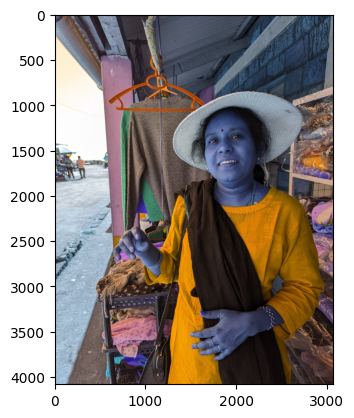

In [ ]:
plt.imshow(img)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(4080, 3072)

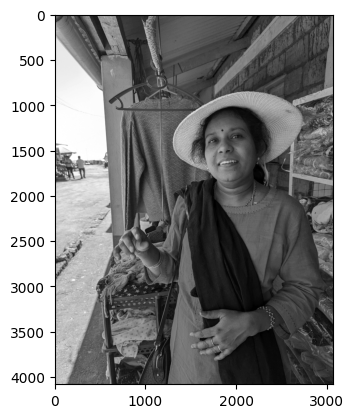

In [ ]:
plt.imshow(gray,cmap='gray')

In [ ]:
scale_percent = 20 # percentage of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# resize image
img = cv2.resize(img, dim)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img.shape

(816, 614, 3)

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

error: ignored

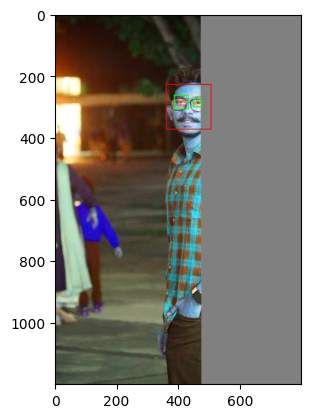

In [ ]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

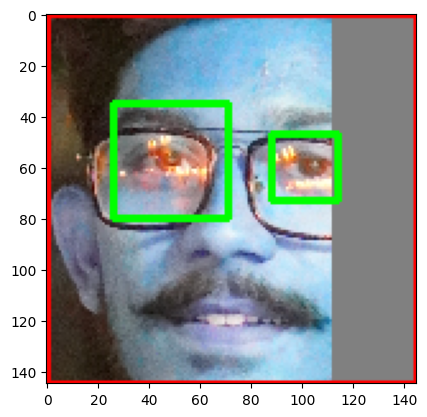

In [ ]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [ ]:
img.shape

(1200, 800, 3)

In [ ]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Set a target size
    target_size = 1000

    # Calculate scale_percent dynamically
    scale_percent = target_size / max(img.shape[0], img.shape[1]) * 100

    # Your resizing code remains the same

    #scale_percent = 100 # percentage of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    img = cv2.resize(img, dim)
    gray = cv2.resize(gray, dim)

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    roi_color_images=[]
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
          roi_color_images.append(roi_color)
    #print("Nothing")
    return roi_color_images

(3460, 4623, 3)

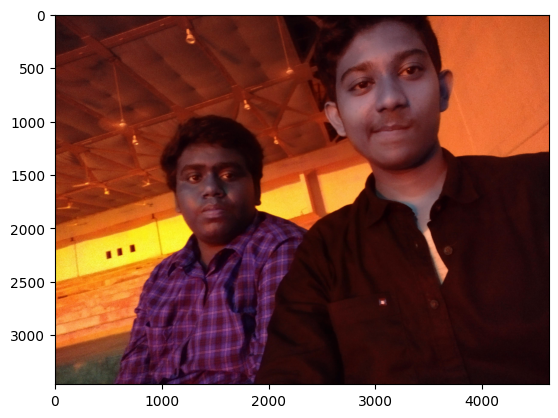

In [ ]:
original_image = cv2.imread('/content/IMG_20180908_182037.jpg')
plt.imshow(original_image)
original_image.shape

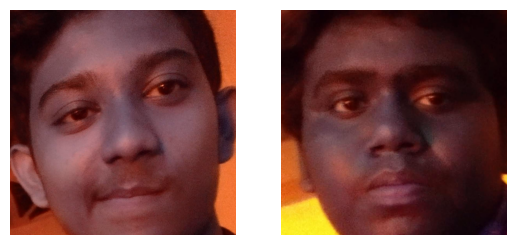

In [ ]:
cropped_images = get_cropped_image_if_2_eyes('/content/IMG_20180908_182037.jpg')
for idx, cropped_image in enumerate(cropped_images):
    plt.subplot(1, len(cropped_images), idx+1)
    plt.imshow(cropped_image)
    plt.axis('off')

plt.show()

# Cropping

In [ ]:
path_to_data = "/content/drive/My Drive/image_datasets"
path_to_cr_data = "/content/drive/My Drive/image_datasets/cropped/"

In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
img_dirs

['/content/drive/My Drive/image_datasets/Rahul_imgs',
 '/content/drive/My Drive/image_datasets/Mom',
 '/content/drive/My Drive/image_datasets/Omar',
 '/content/drive/My Drive/image_datasets/Harshit',
 '/content/drive/My Drive/image_datasets/Navneet Rana']

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
img_dirs1=['/content/drive/My Drive/image_datasets/Navneet Rana','/content/drive/My Drive/image_datasets/Harshit']
for img_dir in img_dirs1:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_colors = get_cropped_image_if_2_eyes(entry.path)  # This should return a list of cropped images
        if roi_colors is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)

            for i, roi_color in enumerate(roi_colors):
                cropped_file_name = celebrity_name + str(count) + "_" + str(i) + ".png"
                cropped_file_path = cropped_folder + "/" + cropped_file_name

                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)

            count += 1


Navneet Rana
Generating cropped images in folder:  /content/drive/My Drive/image_datasets/cropped/Navneet Rana
Harshit
Generating cropped images in folder:  /content/drive/My Drive/image_datasets/cropped/Harshit


# Wavelet Transform

In [ ]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

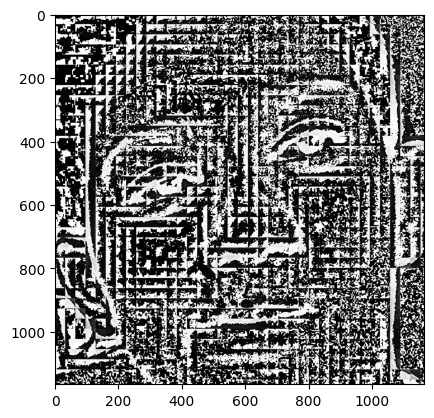

In [ ]:
im_har = w2d(cropped_images[0],'db1',5)
plt.imshow(im_har, cmap='gray')

In [ ]:
cropped_images[0].shape

(1165, 1165, 3)

In [ ]:
cropped_image_dirs=['/content/drive/My Drive/image_datasets/cropped/Rahul_imgs','/content/drive/My Drive/image_datasets/cropped/Omar','/content/drive/My Drive/image_datasets/cropped/Mom','/content/drive/My Drive/image_datasets/cropped/Navneet Rana','/content/drive/My Drive/image_datasets/cropped/Harshit']

In [ ]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Rahul_imgs': ['/content/drive/My Drive/image_datasets/cropped/Rahul_imgs/Rahul_imgs4_0.png',
  '/content/drive/My Drive/image_datasets/cropped/Rahul_imgs/Rahul_imgs6_0.png',
  '/content/drive/My Drive/image_datasets/cropped/Rahul_imgs/Rahul_imgs8_0.png',
  '/content/drive/My Drive/image_datasets/cropped/Rahul_imgs/Rahul_imgs9_0.png',
  '/content/drive/My Drive/image_datasets/cropped/Rahul_imgs/Rahul_imgs10_0.png',
  '/content/drive/My Drive/image_datasets/cropped/Rahul_imgs/Rahul_imgs13_0.png',
  '/content/drive/My Drive/image_datasets/cropped/Rahul_imgs/Rahul_imgs14_0.png',
  '/content/drive/My Drive/image_datasets/cropped/Rahul_imgs/Rahul_imgs15_0.png',
  '/content/drive/My Drive/image_datasets/cropped/Rahul_imgs/Rahul_imgs16_0.png',
  '/content/drive/My Drive/image_datasets/cropped/Rahul_imgs/Rahul_imgs17_0.png',
  '/content/drive/My Drive/image_datasets/cropped/Rahul_imgs/Rahul_imgs18_1.png',
  '/content/drive/My Drive/image_datasets/cropped/Rahul_imgs/Rahul_imgs20_0.png',
  '/co

In [ ]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Rahul_imgs': 0, 'Omar': 1, 'Mom': 2, 'Navneet Rana': 3, 'Harshit': 4}

In [ ]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (250, 250))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (250, 250))
        combined_img = np.vstack((scalled_raw_img.reshape(250*250*3,1),scalled_img_har.reshape(250*250,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [ ]:
len(X[0])

250000

In [ ]:
X = np.array(X).reshape(len(X),250000).astype(float)
X.shape

(102, 250000)

# Training

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y ,random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8461538461538461

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      1.00      1.00         3
           2       1.00      0.50      0.67         6
           3       1.00      1.00      1.00         4
           4       1.00      0.83      0.91         6

    accuracy                           0.85        26
   macro avg       0.93      0.87      0.87        26
weighted avg       0.90      0.85      0.84        26



In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,50,100,500,1000],
            'svc__kernel': ['rbf','linear','poly']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.788333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.709167,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.761667,{'logisticregression__C': 1}


In [ ]:
best_estimators


{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [ ]:
best_estimators['svm'].score(X_test,y_test)

0.8076923076923077

In [ ]:
best_estimators['random_forest'].score(X_test,y_test)

0.7307692307692307

In [ ]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8076923076923077

In [ ]:
best_clf = best_estimators['svm']

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[5, 0, 2, 0, 0],
       [0, 3, 0, 0, 0],
       [0, 3, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 6]])

Text(70.72222222222221, 0.5, 'Truth')

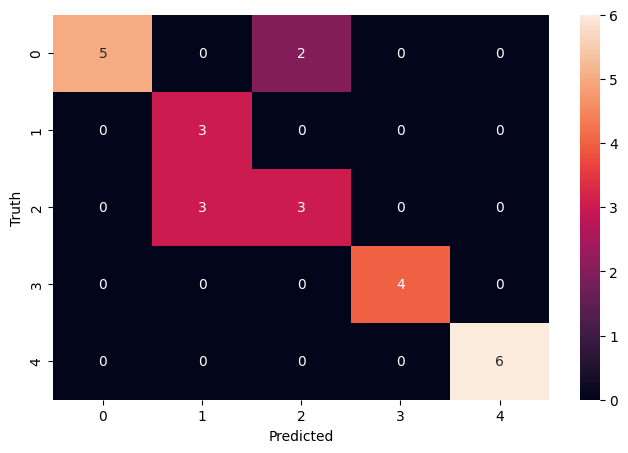

In [ ]:
import seaborn as sn
plt.figure(figsize = (8,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
class_dict

{'Rahul_imgs': 0, 'Omar': 1, 'Mom': 2, 'Navneet Rana': 3, 'Harshit': 4}

# Save the model

In [ ]:
!pip install joblib
import joblib
# Save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [ ]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))